Mean Squared Error: 12.812
R² Score: 0.994


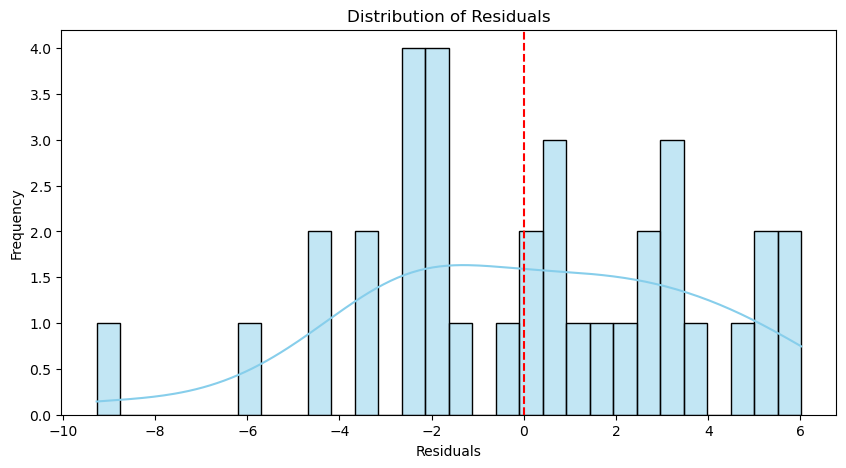

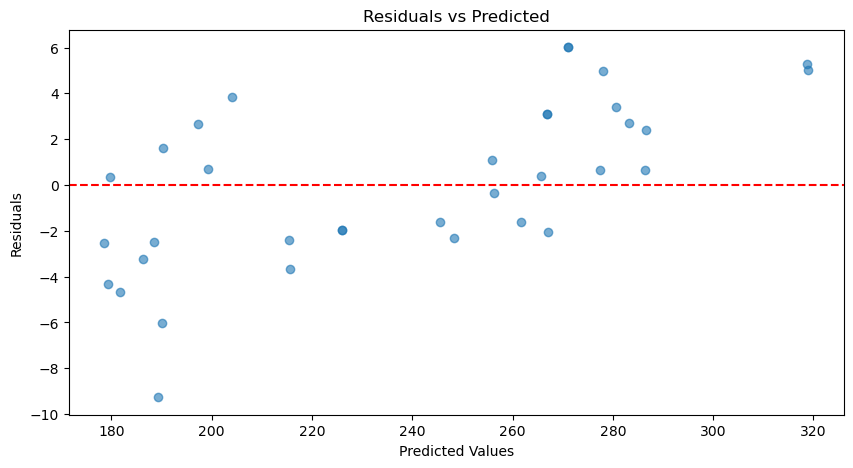

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# ,'Cylinders_3','Cylinders_4','Cylinders_5','Cylinders_6','Cylinders_8'
# ,'Cylinders_10','Cylinders_12','Cylinders_16','Fuel_Comb_log'

# 1. Load your dataset
df = pd.read_csv('Fuel-type-D.csv')  # Uncomment and modify if loading from file
#Example:
target = 'CO2 Emissions(g/km)'
columns_to_drop = ['CO2 Emissions(g/km)']
X = df.drop(columns=columns_to_drop, axis=1)
y = df[target]

# Assuming X and y already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# 2. Define pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(alpha=2, l1_ratio=0.5, max_iter=10000, random_state=42))
])

# 3. Train model
pipeline.fit(X_train, y_train)

# 4. Predictions
y_pred = pipeline.predict(X_test)

# 5. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# 6. Plot residuals distribution
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 7. Residuals vs Predicted
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
